In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from env import host, user, password
import acquire
import wrangle
import prepare
import cluster



import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('zillow_df.csv')

In [3]:
df = df.drop(df.columns[0], axis=1)

In [4]:
df['bed_bath_ratio'] = df.bedroomcnt/df.bathroomcnt

In [5]:
X = df[['longitude', 'latitude', 'age', 'month', 'bedroomcnt',
        'bathroomcnt', 'square_footage', 'lot_size', 'house_value',
        'land_value', 'full_value', 'tax_rate', 'roomcnt',
        'Los_Angeles', 'Orange', 'Ventura', 'bed_bath_ratio']]
y = df[['logerror']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 121)

In [7]:
scaler = MinMaxScaler(copy=True, feature_range=(0,1)).fit(X_train)

train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns.values).set_index([X_train.index.values])

test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values).set_index([X_test.index.values])

train_scaled.head()

,longitude,latitude,age,month,bedroomcnt,bathroomcnt,square_footage,lot_size,house_value,land_value,full_value,tax_rate,roomcnt,Los_Angeles,Orange,Ventura,bed_bath_ratio
21711,0.157109,0.607455,0.031250,0.250,0.200000,0.088235,0.056347,0.000971,0.016757,0.003120,0.006246,0.029456,0.4,0.0,0.0,1.0,0.109375
72428,0.672587,0.529268,0.307292,1.000,0.133333,0.058824,0.047217,0.000355,0.010196,0.001509,0.003413,0.015319,0.0,1.0,0.0,0.0,0.101562
20516,0.713434,0.482563,0.437500,0.250,0.066667,0.058824,0.026790,0.001023,0.009455,0.003694,0.005455,0.015570,0.0,1.0,0.0,0.0,0.062500
42112,0.783232,0.490910,0.166667,0.625,0.066667,0.058824,0.032001,0.007152,0.010826,0.000849,0.002873,0.017562,0.0,1.0,0.0,0.0,0.062500
6853,0.598599,0.310265,0.208333,0.000,0.200000,0.117647,0.083829,0.001027,0.010961,0.006271,0.008308,0.015404,0.0,1.0,0.0,0.0,0.088542


In [8]:
list_of_3_variables = train_scaled[['latitude', 'longitude', 'roomcnt']]

     k          sse
0    2  3505.111745
1    3  2203.060310
2    4  1358.422605
3    5  1005.138344
4    6   766.365584
5    7   607.349427
6    8   524.460097
7    9   474.115045
8   10   440.585010
9   11   398.490907
10  12   362.009456
11  13   338.448075
12  14   303.830052
13  15   283.274901
14  16   261.171845
15  17   245.722264
16  18   228.841594
17  19   218.271596


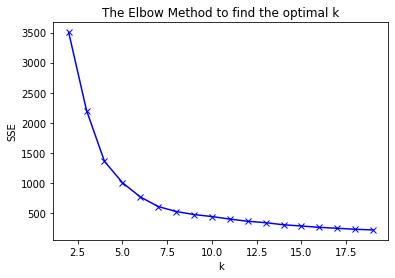

In [9]:
optimal_k = cluster.elbow_method(list_of_3_variables)

In [10]:
kmeans, train_clusters, test_clusters, cluster_counts = cluster.get_clusters_and_counts(10, ['latitude', 'longitude', 'roomcnt'], 
                                                                                        'first_try', train_scaled, test_scaled)

In [11]:
train_clusters

,first_try
21711,2
72428,0
20516,6
42112,6
6853,4
...,...
30754,5
36351,4
51265,7
56584,5


In [12]:
cluster_vars = ['longitude', 'latitude', 'roomcnt']
cluster_col_name = 'first_try'
centroid_col_names = ['centroid_' + i for i in cluster_vars]

In [13]:
X_train, train_scaled, X_test, test_scaled, centroids = cluster.append_clusters_and_centroids(
                                X_train, train_scaled, train_clusters, 
                                X_test, test_scaled, test_clusters, 
                                cluster_col_name, centroid_col_names, kmeans)

In [14]:
X_train

,longitude,latitude,age,month,bedroomcnt,bathroomcnt,square_footage,lot_size,house_value,land_value,...,tax_rate,roomcnt,Los_Angeles,Orange,Ventura,bed_bath_ratio,first_try,centroid_longitude,centroid_latitude,centroid_roomcnt
21711,-119173645.0,34238098.0,7.0,3,4.0,2.5,1464.0,7201.0,153720.0,153720.0,...,0.024141,6.0,0,0,1,1.600000,2,0.611676,0.211187,3.496290e-01
72428,-118183524.0,34122442.0,60.0,9,3.0,2.0,1266.0,2911.0,93588.0,74869.0,...,0.012600,0.0,1,0,0,1.500000,0,0.508320,0.595642,-1.762479e-14
20516,-118105067.0,34053353.0,85.0,3,2.0,2.0,823.0,7564.0,86795.0,181819.0,...,0.012805,0.0,1,0,0,1.000000,6,0.473566,0.798665,2.386525e-04
42112,-117971000.0,34065700.0,33.0,6,2.0,2.0,936.0,50291.0,99368.0,42578.0,...,0.014431,0.0,1,0,0,1.000000,6,0.473566,0.798665,2.386525e-04
6853,-118325639.0,33798484.0,41.0,1,4.0,3.0,2060.0,7592.0,100601.0,307982.0,...,0.012669,0.0,1,0,0,1.333333,4,0.346644,0.648084,3.428571e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30754,-118071760.0,34586675.0,61.0,4,3.0,2.0,1056.0,7257.0,132794.0,33198.0,...,0.016483,0.0,1,0,0,1.500000,5,0.870641,0.701126,1.998401e-15
36351,-118337522.0,33783671.0,58.0,5,3.0,2.0,2220.0,23328.0,369551.0,1478204.0,...,0.011057,0.0,1,0,0,1.500000,4,0.346644,0.648084,3.428571e-04
51265,-117996812.0,33723862.0,55.0,6,4.0,2.0,1390.0,6001.0,86586.0,181689.0,...,0.011759,7.0,0,1,0,2.000000,7,0.309191,0.808532,4.362864e-01
56584,-118281892.0,34522021.0,52.0,7,5.0,3.0,3123.0,225070.0,156736.0,13849.0,...,0.012540,0.0,1,0,0,1.666667,5,0.870641,0.701126,1.998401e-15
